## 清洗数据

In [1]:
import pandas as pd

In [2]:
movies_df = pd.read_json('movie300new_mobile_info.json')
movies_df.head()


,actors,aka,body_bg_color,can_interact,card_subtitle,channels,comment_count,countries,cover.allow_comment,cover.author.avatar,...,trailer.type,trailer.uri,trailer.video_url,type,url,vendor_count,vendor_icons,webisode,webisode_count,year
0,"[{'name': '路易·加瑞尔', 'roles': ['演员', '导演', '编剧'...","[情陷高达(台), 高达：革命性改变(港), Redoubtable]",f9f4f9,True,2017 / 法国 缅甸 / 喜剧 传记 爱情 / 米歇尔·阿扎纳维西于斯 / 路易·加瑞尔...,[],311,"[法国, 缅甸]",True,https://img3.doubanio.com/icon/up49290419-14.jpg,...,A,https://m.douban.com/movie/trailer/223633,http://vt1.doubanio.com/201802031710/31d654f56...,movie,douban://douban.com/movie/26785583,0,[],NaN,0,2017
1,"[{'name': '于毅', 'roles': ['演员'], 'title': '于毅（...","[灵魂摆渡大电影, 灵魂摆渡 电影版, 灵魂摆渡·黄泉篇]",f9f7f4,True,2018 / 中国大陆 / 悬疑 奇幻 惊悚 / 巨兴茂 / 于毅 何花,[],2049,[中国大陆],True,https://img3.doubanio.com/icon/up3806472-11.jpg,...,A,https://m.douban.com/movie/trailer/226690,http://vt1.doubanio.com/201802031710/a6209b05c...,movie,douban://douban.com/movie/26910820,1,[https://img3.doubanio.com/f/frodo/16069becd18...,NaN,0,2018
10,"[{'name': '詹姆斯·弗兰科', 'roles': ['演员', '制片', '导演...","[大灾难家(台), 荷里活烂片王(港), The Masterpiece]",f4f9f7,True,2017 / 美国 / 剧情 喜剧 传记 / 詹姆斯·弗兰科 / 詹姆斯·弗兰科 戴夫·弗兰科,"[{'is_followed': False, 'sharing_url': '', 'fo...",4884,[美国],True,https://img1.doubanio.com/icon/up4403626-327.jpg,...,A,https://m.douban.com/movie/trailer/223932,http://vt1.doubanio.com/201802031708/8ca122639...,movie,douban://douban.com/movie/25944886,0,[],NaN,0,2017
100,"[{'name': '伊尔凡·可汗', 'roles': ['演员'], 'title': ...","[可怜天下父母心, हिंदी]",f9f9f4,True,2017 / 印度 / 剧情 喜剧 / 萨基特·乔杜里 / 伊尔凡·可汗 萨巴·卡玛尔,[],4065,[印度],True,https://img3.doubanio.com/icon/up153224896-2.jpg,...,None,None,None,movie,douban://douban.com/movie/26942631,0,[],NaN,0,2017
101,"[{'name': '阿黛拉·哈内尔', 'roles': ['演员'], 'title':...","[昨日盛开的花朵(港/台), The Bloom of Yesterday, The Flo...",fcf7f8,True,2016 / 奥地利 德国 法国 / 剧情 喜剧 爱情 / 克里斯·克劳斯 / 阿黛拉·哈内...,[],172,"[奥地利, 德国, 法国]",True,https://img3.doubanio.com/icon/up49290419-14.jpg,...,A,https://m.douban.com/movie/trailer/215069,http://vt1.doubanio.com/201802030537/4c454c844...,movie,douban://douban.com/movie/26608943,0,[],NaN,0,2016


### 首先选出我需要的movie的列
#### 先打印所有的列，一列一列的来看【做完就只有半条命了】

In [3]:
movies_df.columns

Index(['actors', 'aka', 'body_bg_color', 'can_interact', 'card_subtitle',
       'channels', 'comment_count', 'countries', 'cover.allow_comment',
       'cover.author.avatar', 'cover.author.id', 'cover.author.kind',
       'cover.author.loc', 'cover.author.loc.id', 'cover.author.loc.name',
       'cover.author.loc.uid', 'cover.author.name', 'cover.author.type',
       'cover.author.uid', 'cover.author.uri', 'cover.author.url',
       'cover.comments_count', 'cover.create_time', 'cover.description',
       'cover.id', 'cover.image.large.height', 'cover.image.large.url',
       'cover.image.large.width', 'cover.image.normal.height',
       'cover.image.normal.url', 'cover.image.normal.width',
       'cover.image.small.height', 'cover.image.small.url',
       'cover.image.small.width', 'cover.liked', 'cover.likers_count',
       'cover.owner_uri', 'cover.position', 'cover.sharing_url', 'cover.type',
       'cover.uri', 'cover.url', 'directors', 'durations', 'episodes_count',
       'forum

In [4]:
choosed_columns = ['actors',        #参演人员，所有的演员的信息    ==待处理==
                   'aka',           #别名
                   'card_subtitle', #日期，国家，类型，主演....
                   'comment_count', #评论数量
                   'countries',     #国家 ， 好像card_subtitle里面有，暂时保留
                   'cover.author.avatar', #编辑这个的编辑的头像
                   'cover.author.id', #编辑这个电影的编辑的id
                   'cover.author.loc.name', #编辑这个电影的编辑所在地区
                   'cover.author.loc.uid',#编辑这个电影的编辑所在地区的id（拼音）
                   'cover.author.name', ##编辑这个电影的编辑的姓名
                   'cover.author.uid', #编辑这个电影的编辑的id
                   'cover.author.url', #编辑这个电影的编辑的个人主页
                   'cover.comments_count', #编辑这个电影的Cover的评论数
                   'cover.create_time',    #编辑这个电影的Cover创建时间
                   'directors',      #导演信息    ==待处理==
                   'durations',      #电影的时长
                   'genres',         #电影的类型
                   'has_linewatch',  #有没有在线观看的链接
                   'id',             #影片的id，鉴别不同的影片
                   'info_url',       #url链接里面包含了：片名，原名，又名，导演，主演，上映，类型，片场，地区，语言，IMDB的链接
                   'intro',          #电影简介
                   'is_douban_intro', #是不是豆瓣的简介，还是其它地方的
                   'languages',      #语言类型
                   'lineticket_url', #可以在线购买的链接（和猫眼合作的）
                   'original_title', #原名，里面有部分是空值
                   'pubdate',        #公映时间和发布地方
                   'rating.count',   #打分的数量
                   'rating.star_count', #以5星为满星的 分值
                   'rating.value',   #以10分为满分的 分值   ===？？和上一个不同，是不是有专业用户和一般用户的综合？或者中和imdb？？？
                   'release_date',   #和前面的公映时间pubdate一样，少了发布的地方
                   'review_count',   #暂时不知道是什么意思，留着
                   'title',          #影片名
                   'trailer.create_time', #试看的时间，应该可以和pubtime做一个对比，看一般多久会出试看视频
                   'trailer.n_comments', #预告片的评论数，感觉应该和影片评论数正相关
                   'trailer.runtime',    #预告片的时长
                   'year'            #年，==？？暂时不知道什么时间
                  ]

In [5]:
movies_df['year'].value_counts()[:10]

2017    221
2016     71
2018      8
Name: year, dtype: int64

In [6]:
movies_df['trailer.create_time'].sort_values(ascending = False)[:20]

238   2018-01-27
1     2018-01-26
56    2018-01-24
123   2018-01-24
75    2018-01-23
25    2018-01-19
191   2018-01-19
276   2018-01-17
32    2018-01-10
47    2018-01-09
79    2018-01-08
150   2018-01-08
242   2018-01-08
43    2018-01-03
252   2018-01-03
264   2017-12-28
265   2017-12-22
228   2017-12-20
135   2017-12-20
203   2017-12-18
Name: trailer.create_time, dtype: datetime64[ns]

In [7]:
movie300_choosed_column = movies_df[choosed_columns]

In [8]:
movie300_choosed_column.loc[0,'actors'][0]

{'abstract': '英俊而古怪，浪漫而危险，沉默寡言却总能获得女性的好感，普通演员一辈子挑战的禁忌话题可能也不会有他...',
 'author': None,
 'avatar': {'large': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p172.jpg',
  'normal': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p172.jpg'},
 'cover_url': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p172.jpg',
 'id': '1018067',
 'name': '路易·加瑞尔',
 'roles': ['演员', '导演', '编剧', '摄影', '配音'],
 'sharing_url': 'https://www.douban.com/doubanapp/dispatch?uri=/celebrity/1018067/',
 'title': '路易·加瑞尔（同名）法国,巴黎影视演员',
 'type': 'celebrity',
 'uri': 'douban://douban.com/celebrity/1018067?subject_id=27223791',
 'url': 'https://movie.douban.com/celebrity/1018067/'}

In [9]:
movie300_choosed_column.loc[0,'directors']

[{'abstract': '迈克尔·哈扎纳维希乌斯 (Michel Hazanavicius，1967年3月29日-) 是一名法国电影导演、制片人和编剧。他...',
  'author': None,
  'avatar': {'large': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p40836.jpg',
   'normal': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p40836.jpg'},
  'cover_url': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p40836.jpg',
  'id': '1286302',
  'name': '米歇尔·阿扎纳维西于斯',
  'roles': ['编剧', '导演', '演员', '剪辑', '制片'],
  'sharing_url': 'https://www.douban.com/doubanapp/dispatch?uri=/celebrity/1286302/',
  'title': '米歇尔·阿扎纳维西于斯（同名）法国,巴黎影视演员',
  'type': 'celebrity',
  'uri': 'douban://douban.com/celebrity/1286302?subject_id=27514580',
  'url': 'https://movie.douban.com/celebrity/1286302/'}]

In [10]:
movie300_choosed_column.loc[0,'info_url']

'https://www.douban.com/doubanapp//h5/movie/26785583/desc'

In [11]:
#actor中，准备只提取一号演员的id姓名和角色，主演中的主演
#写一个函数:
def get_actors_info(actor):
    try:
        actor_id = actor[0]['id']
        actor_name = actor[0]['name']
        actor_roles = actor[0]['roles']
    except:
        actor_id = ''
        actor_name = ''
        actor_roles = ''
    return actor_id,actor_name,actor_roles

In [12]:
temp = movie300_choosed_column[:10]

In [13]:
temp['actors'].apply(lambda x:get_actors_info(x))

0       (1018067, 路易·加瑞尔, [演员, 导演, 编剧, 摄影, 配音])
1                           (1317344, 于毅, [演员])
10     (1019001, 詹姆斯·弗兰科, [演员, 制片, 导演, 编剧, 配音])
100                     (1108861, 伊尔凡·可汗, [演员])
101                    (1304507, 阿黛拉·哈内尔, [演员])
102                        (1274286, 江一燕, [演员])
103                        (1314851, 田小洁, [演员])
104              (1003484, 丹尼尔·雷德克里夫, [演员, 配音])
105                  (1172713, 玛达琳娜·波扎斯卡, [演员])
106        (1054455, 尼古拉斯·凯奇, [演员, 制片, 配音, 导演])
Name: actors, dtype: object

In [14]:
temp['id'],temp['actor'],temp['roles'] = zip(*list(temp['actors'].apply(lambda x:get_actors_info(x))))
#好吧，测试暂时算成功了，今后再找其它方法
temp[['id','actor','roles']]

/home/bigdata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,actor,roles
0,1018067,路易·加瑞尔,"[演员, 导演, 编剧, 摄影, 配音]"
1,1317344,于毅,[演员]
10,1019001,詹姆斯·弗兰科,"[演员, 制片, 导演, 编剧, 配音]"
100,1108861,伊尔凡·可汗,[演员]
101,1304507,阿黛拉·哈内尔,[演员]
102,1274286,江一燕,[演员]
103,1314851,田小洁,[演员]
104,1003484,丹尼尔·雷德克里夫,"[演员, 配音]"
105,1172713,玛达琳娜·波扎斯卡,[演员]
106,1054455,尼古拉斯·凯奇,"[演员, 制片, 配音, 导演]"


In [15]:
movie300_choosed_column['actor_id'],movie300_choosed_column['actor'],movie300_choosed_column['actor_roles'] = zip(*list(movie300_choosed_column['actors'].apply(lambda x:get_actors_info(x))))

/home/bigdata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
movie300_choosed_column[['actor_id','actor','actor_roles']].head()

,actor_id,actor,actor_roles
0,1018067,路易·加瑞尔,"[演员, 导演, 编剧, 摄影, 配音]"
1,1317344,于毅,[演员]
10,1019001,詹姆斯·弗兰科,"[演员, 制片, 导演, 编剧, 配音]"
100,1108861,伊尔凡·可汗,[演员]
101,1304507,阿黛拉·哈内尔,[演员]


In [17]:
#下面写个函数，提出导演的信息，发现可以用和演员一样的玩儿法
movie300_choosed_column['director_id'],movie300_choosed_column['director'],movie300_choosed_column['director_roles'] = zip(*list(movie300_choosed_column['directors'].apply(lambda x:get_actors_info(x))))

/home/bigdata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
movie300_choosed_column[['director_id','director','director_roles']].head()

,director_id,director,director_roles
0,1286302,米歇尔·阿扎纳维西于斯,"[编剧, 导演, 演员, 剪辑, 制片]"
1,1317055,巨兴茂,"[演员, 导演, 副导演]"
10,1019001,詹姆斯·弗兰科,"[演员, 制片, 导演, 编剧, 配音]"
100,1383681,萨基特·乔杜里,"[导演, 编剧]"
101,1288992,克里斯·克劳斯,"[导演, 编剧, 制片]"


In [19]:
drop_list = ['directors','actors']
movie300_choosed_column = movie300_choosed_column.drop(drop_list,axis=1)

In [20]:
movie300_choosed_column.columns

Index(['aka', 'card_subtitle', 'comment_count', 'countries',
       'cover.author.avatar', 'cover.author.id', 'cover.author.loc.name',
       'cover.author.loc.uid', 'cover.author.name', 'cover.author.uid',
       'cover.author.url', 'cover.comments_count', 'cover.create_time',
       'durations', 'genres', 'has_linewatch', 'id', 'info_url', 'intro',
       'is_douban_intro', 'languages', 'lineticket_url', 'original_title',
       'pubdate', 'rating.count', 'rating.star_count', 'rating.value',
       'release_date', 'review_count', 'title', 'trailer.create_time',
       'trailer.n_comments', 'trailer.runtime', 'year', 'actor_id', 'actor',
       'actor_roles', 'director_id', 'director', 'director_roles'],
      dtype='object')

In [21]:
movie300_choosed_column.loc[:,"aka":].head()

,aka,card_subtitle,comment_count,countries,cover.author.avatar,cover.author.id,cover.author.loc.name,cover.author.loc.uid,cover.author.name,cover.author.uid,...,trailer.create_time,trailer.n_comments,trailer.runtime,year,actor_id,actor,actor_roles,director_id,director,director_roles
0,"[情陷高达(台), 高达：革命性改变(港), Redoubtable]",2017 / 法国 缅甸 / 喜剧 传记 爱情 / 米歇尔·阿扎纳维西于斯 / 路易·加瑞尔...,311,"[法国, 缅甸]",https://img3.doubanio.com/icon/up49290419-14.jpg,49290419,苏州,suzhou,西楼尘,xilouchen,...,2017-11-09,1.0,01:49,2017,1018067,路易·加瑞尔,"[演员, 导演, 编剧, 摄影, 配音]",1286302,米歇尔·阿扎纳维西于斯,"[编剧, 导演, 演员, 剪辑, 制片]"
1,"[灵魂摆渡大电影, 灵魂摆渡 电影版, 灵魂摆渡·黄泉篇]",2018 / 中国大陆 / 悬疑 奇幻 惊悚 / 巨兴茂 / 于毅 何花,2049,[中国大陆],https://img3.doubanio.com/icon/up3806472-11.jpg,3806472,北京,beijing,披头,xiaoqiang1215,...,2018-01-26,6.0,01:40,2018,1317344,于毅,[演员],1317055,巨兴茂,"[演员, 导演, 副导演]"
10,"[大灾难家(台), 荷里活烂片王(港), The Masterpiece]",2017 / 美国 / 剧情 喜剧 传记 / 詹姆斯·弗兰科 / 詹姆斯·弗兰科 戴夫·弗兰科,4884,[美国],https://img1.doubanio.com/icon/up4403626-327.jpg,4403626,La Habana,lahabana,托尼·王大拿,Zizou_Vam,...,2017-11-16,0.0,02:19,2017,1019001,詹姆斯·弗兰科,"[演员, 制片, 导演, 编剧, 配音]",1019001,詹姆斯·弗兰科,"[演员, 制片, 导演, 编剧, 配音]"
100,"[可怜天下父母心, हिंदी]",2017 / 印度 / 剧情 喜剧 / 萨基特·乔杜里 / 伊尔凡·可汗 萨巴·卡玛尔,4065,[印度],https://img3.doubanio.com/icon/up153224896-2.jpg,153224896,天津,tianjin,熊猫仔,153224896,...,NaT,NaN,None,2017,1108861,伊尔凡·可汗,[演员],1383681,萨基特·乔杜里,"[导演, 编剧]"
101,"[昨日盛开的花朵(港/台), The Bloom of Yesterday, The Flo...",2016 / 奥地利 德国 法国 / 剧情 喜剧 爱情 / 克里斯·克劳斯 / 阿黛拉·哈内...,172,"[奥地利, 德国, 法国]",https://img3.doubanio.com/icon/up49290419-14.jpg,49290419,苏州,suzhou,西楼尘,xilouchen,...,2017-04-03,0.0,01:56,2016,1304507,阿黛拉·哈内尔,[演员],1288992,克里斯·克劳斯,"[导演, 编剧, 制片]"


## 对豆瓣最新的300影片进行分析

In [22]:
df = movie300_choosed_column #把movie300_choosed_column写个短名，免得用起来不方便

In [23]:
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl

%matplotlib inline

font = {'family' : 'Microsoft YaHei',
        'weight' : 'bold',
        'size'   : 20.0}
mpl.rc('figure', figsize = (14,7)) #桌面大小
mpl.rc('font', **font) #设置字体
mpl.rc('axes', 
              grid = False, 
              facecolor = 'white',  #背景颜色
              edgecolor = 'k', 
              linewidth = 1.25
       
      )

plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# from pylab import *  

# ChineseFont = matplotlib.font_manager.FontProperties(fname='SimHei.ttf')#需要在用中文的地方加入fontproperties = ChineseFont
# mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题    




#### 电影评论的数量

Text(0.5,1,'电影评论的数量')

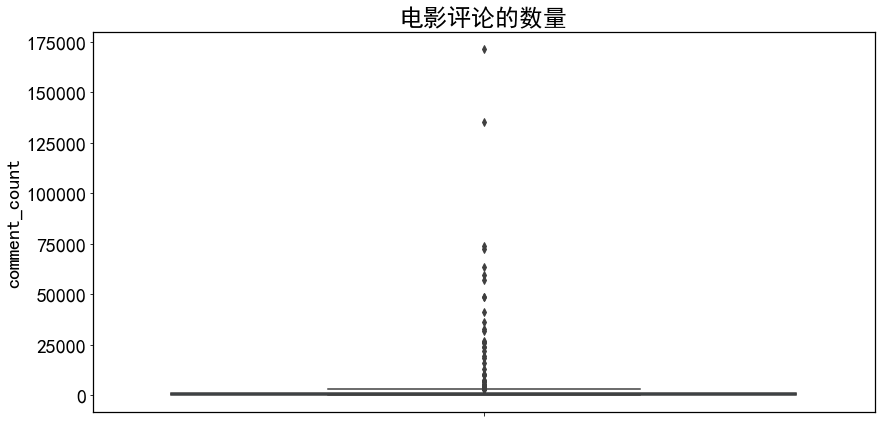

In [24]:
sns.boxplot(y = 'comment_count',  data = df)
#说明评论非常不均衡，而且大部分集中在靠近0的位置
ax = plt.gca()
ax.set_title('电影评论的数量')

#### 国家包含电影的数量

In [25]:
#统计一下国家包含电影的数量
country_dict = {}
for countries in df['countries'].values:
    for country in countries:
        if country in country_dict.keys():
            country_dict[country] += 1
        else:
            country_dict[country] = 1
country_dict

{'中国大陆': 39,
 '丹麦': 7,
 '俄罗斯': 5,
 '保加利亚': 2,
 '克罗地亚': 3,
 '加拿大': 16,
 '南非': 2,
 '卢森堡': 1,
 '印度': 5,
 '印度尼西亚': 1,
 '台湾': 7,
 '哥伦比亚': 1,
 '土耳其': 1,
 '埃及': 1,
 '塞尔维亚': 1,
 '墨西哥': 2,
 '奥地利': 3,
 '希腊': 1,
 '德国': 17,
 '意大利': 4,
 '挪威': 3,
 '捷克': 2,
 '斯洛文尼亚': 1,
 '新加坡': 2,
 '日本': 34,
 '智利': 2,
 '柬埔寨': 1,
 '比利时': 9,
 '法国': 34,
 '波兰': 1,
 '波黑': 1,
 '泰国': 1,
 '澳大利亚': 6,
 '爱尔兰': 3,
 '瑞典': 6,
 '瑞士': 2,
 '缅甸': 1,
 '罗马尼亚': 2,
 '美国': 113,
 '芬兰': 1,
 '英国': 24,
 '荷兰': 3,
 '西班牙': 5,
 '阿根廷': 1,
 '韩国': 27,
 '香港': 6,
 '马其顿': 2,
 '马来西亚': 1,
 '马耳他': 1}

In [26]:
country_df = pd.DataFrame(list(country_dict.items()))
country_df = country_df.sort_values(1, ascending = False)

In [27]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
font = {
        'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 20
        }
mpl.rc('font',**font)

In [28]:
count_all = country_df[1].sum()
fracs = [float(n)/count_all for n in country_df[1].values]
labels = [n for n in country_df[0].values]

Text(0.5,1,'出产电影地区分布')

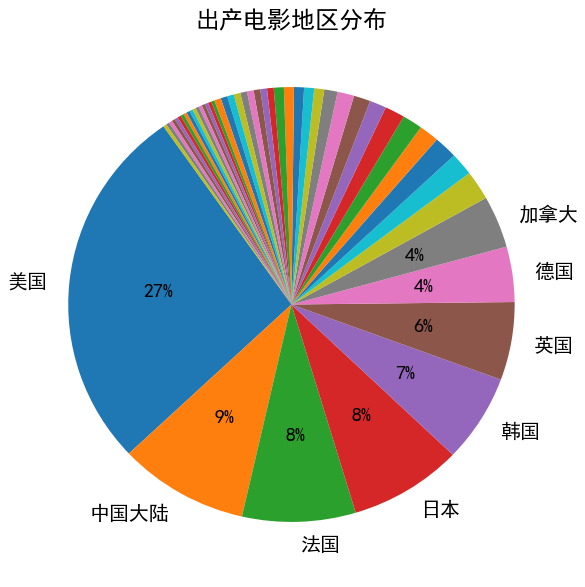

In [29]:
def pie_pct_format(value): #这个value带入的是百分比。value<1表示百分比小于1，则返回空字符串给autotexts
    return '' if value < 3 else '%.0f%%' % value

fig = plt.figure(figsize=(10, 10), facecolor='white', edgecolor='white')
#colors = ['yellowgreen', 'lightskyblue', 'gold', 'purple', 'lightcoral', 'yellow', 'black'] 
#explode = (0.05, 0.05, 0.1, 0, 0, 0, 0)#饼图中间出现缝隙，分离度便于更好的看饼图大小数据
patches, texts, autotexts = plt.pie(fracs,
                                    labels=labels,
#                                     colors=colors,
#                                     explode=explode, #pie图分离度
                                    autopct=pie_pct_format,#返回不同的autotext的值，返回条件是这个函数
                                    shadow=False,  #不用阴影，默认为False
                                    startangle=125 #逆时针旋转角度
                                   )
for text, autotext in zip(texts, autotexts):#根据plt.pie中autopct=pie_pct_format返回的autotext配置返回text
    if autotext.get_text() == '':
        text.set_text('')  # 如果比例太小，不显示百分比标签
#plt.legend(labels, loc=(0.80, -0.1), shadow=True)

ax = plt.gca()
ax.set_title('出产电影地区分布')

** 电影封面的编辑所在地区 **

In [30]:
cover_author_loc = df['cover.author.loc.name'].value_counts().to_frame()

Text(0.5,1,'电影封面编辑地区分布')

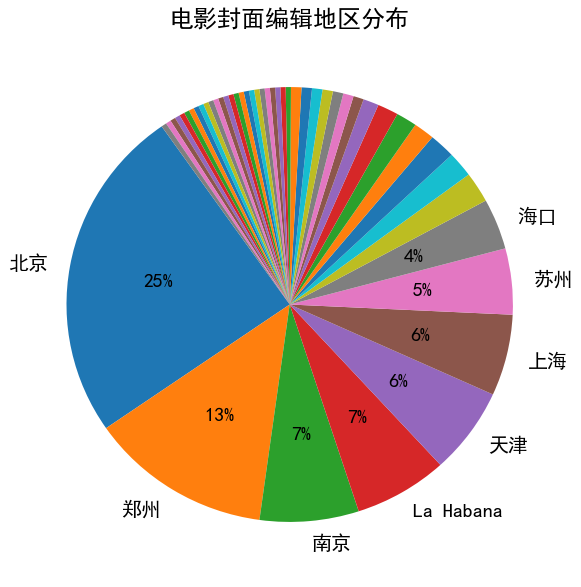

In [31]:
count_all = cover_author_loc['cover.author.loc.name'].sum()
fracs = [float(n)/count_all for n in cover_author_loc['cover.author.loc.name'].values]
labels = [n for n in cover_author_loc.index.values]
def pie_pct_format(value): #这个value带入的是百分比。value<1表示百分比小于1，则返回空字符串给autotexts
    return '' if value < 3 else '%.0f%%' % value

fig = plt.figure(figsize=(10, 10), facecolor='white', edgecolor='white')
#colors = ['yellowgreen', 'lightskyblue', 'gold', 'purple', 'lightcoral', 'yellow', 'black'] 
#explode = (0.05, 0.05, 0.1, 0, 0, 0, 0)#饼图中间出现缝隙，分离度便于更好的看饼图大小数据
patches, texts, autotexts = plt.pie(fracs,
                                    labels=labels,
#                                     colors=colors,
#                                     explode=explode, #pie图分离度
                                    autopct=pie_pct_format,#返回不同的autotext的值，返回条件是这个函数
                                    shadow=False,  #不用阴影，默认为False
                                    startangle=125 #逆时针旋转角度
                                   )
for text, autotext in zip(texts, autotexts):#根据plt.pie中autopct=pie_pct_format返回的autotext配置返回text
    if autotext.get_text() == '':
        text.set_text('')  # 如果比例太小，不显示百分比标签
#plt.legend(labels, loc=(0.80, -0.1), shadow=True)

ax = plt.gca()
ax.set_title('电影封面编辑地区分布')

** 电影封面的编辑 **

In [32]:
cover_author_name = df['cover.author.name'].value_counts().to_frame()

Text(0.5,1,'电影TOP编辑')

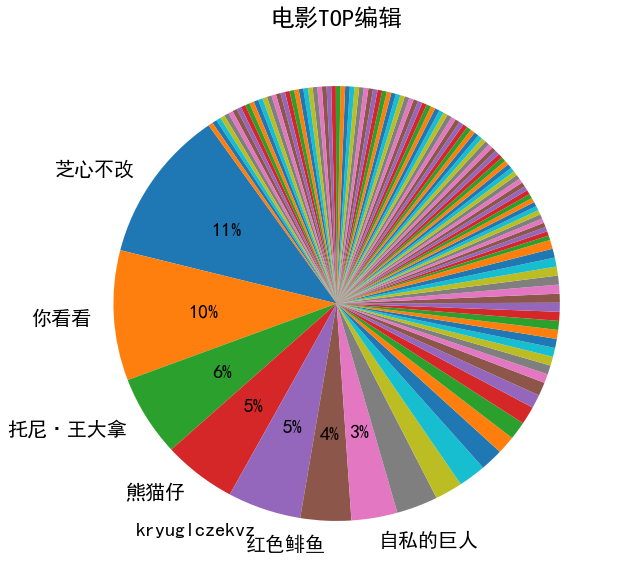

In [33]:
count_all = cover_author_name['cover.author.name'].sum()
fracs = [float(n)/count_all for n in cover_author_name['cover.author.name'].values]
labels = [n for n in cover_author_name.index.values]
def pie_pct_format(value): #这个value带入的是百分比。value<1表示百分比小于1，则返回空字符串给autotexts
    return '' if value < 3 else '%.0f%%' % value

fig = plt.figure(figsize=(10, 10), facecolor='white', edgecolor='white')
#colors = ['yellowgreen', 'lightskyblue', 'gold', 'purple', 'lightcoral', 'yellow', 'black'] 
#explode = (0.05, 0.05, 0.1, 0, 0, 0, 0)#饼图中间出现缝隙，分离度便于更好的看饼图大小数据
patches, texts, autotexts = plt.pie(fracs,
                                    labels=labels,
#                                     colors=colors,
#                                     explode=explode, #pie图分离度
                                    autopct=pie_pct_format,#返回不同的autotext的值，返回条件是这个函数
                                    shadow=False,  #不用阴影，默认为False
                                    startangle=125 #逆时针旋转角度
                                   )
for text, autotext in zip(texts, autotexts):#根据plt.pie中autopct=pie_pct_format返回的autotext配置返回text
    if autotext.get_text() == '':
        text.set_text('')  # 如果比例太小，不显示百分比标签
#plt.legend(labels, loc=(0.80, -0.1), shadow=True)

ax = plt.gca()
ax.set_title('电影TOP编辑')

In [34]:
#验证一下,说明2、8法则还是适用
temp = df['cover.author.name'].value_counts()[:7].to_frame()
df[df['cover.author.name'].isin(list(temp.index.values))].groupby(['cover.author.loc.name','cover.author.name']).size().sort_values(0,ascending=False).to_frame()

,,0
cover.author.loc.name,cover.author.name,
郑州,芝心不改,34
北京,你看看,29
La Habana,托尼·王大拿,18
天津,熊猫仔,16
南京,红色鲱鱼,11
海口,自私的巨人,10


** 电影片长 **

In [35]:
import re
def get_duration_data(data, pattern, n):
    string = data[0] if len(data) > 0 else ''
    result = re.search(pattern, string)
    if result:
        #print(result.group(n))
        return result.group(n)
    return 0
df['durations_float'] = df['durations'].apply(lambda x:float(get_duration_data(x, pattern='\d+', n=0)))

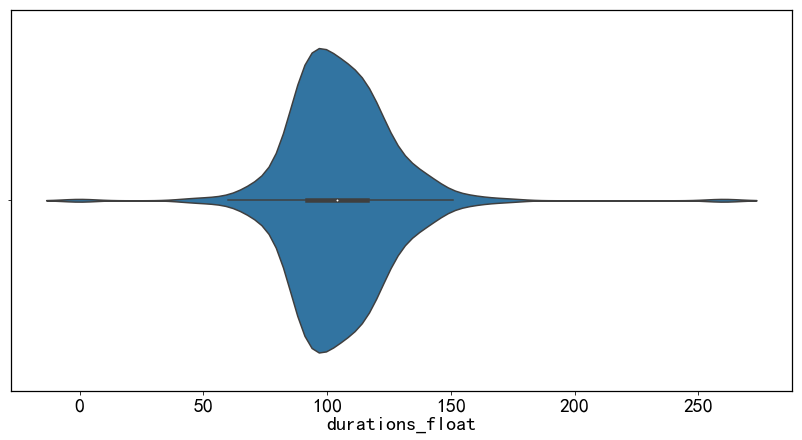

In [36]:
sns.violinplot('durations_float', data=df['durations_float'].to_frame())

In [37]:
#基本集中在2小时左右

In [38]:
df['durations_float'].describe()

count    300.000000
mean     105.386667
std       21.096620
min        0.000000
25%       92.000000
50%      104.000000
75%      116.250000
max      260.000000
Name: durations_float, dtype: float64

In [39]:
df[['durations_float','title']].sort_values('durations_float')[:10]

,durations_float,title
295,0.0,妖精的尾巴剧场版：龙泣
263,45.0,权力的游戏：征服与反抗
225,53.0,伏地魔：传人的起源
132,60.0,妄想学生会 剧场版
168,64.0,告白实行委员会：喜欢上你的那个瞬间
242,70.0,杀无赦I入局
298,70.0,伏妖白鱼镇
142,70.0,小戏骨：花木兰
138,71.0,酒会
24,72.0,向阳之处必有声


** 统计电影类型的数量 **

In [40]:
genres_dict = {}
for genres in df['genres'].values:
    for genre in genres:
        if genre in genres_dict.keys():
            genres_dict[genre] +=1
        else:
            genres_dict[genre] = 1
genres_dict

{'传记': 35,
 '儿童': 7,
 '冒险': 22,
 '剧情': 185,
 '动作': 40,
 '动画': 20,
 '历史': 18,
 '古装': 6,
 '同性': 13,
 '喜剧': 77,
 '奇幻': 18,
 '家庭': 9,
 '恐怖': 20,
 '悬疑': 24,
 '情色': 2,
 '惊悚': 46,
 '战争': 11,
 '歌舞': 3,
 '武侠': 1,
 '灾难': 4,
 '爱情': 42,
 '犯罪': 42,
 '科幻': 20,
 '运动': 5,
 '音乐': 7}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

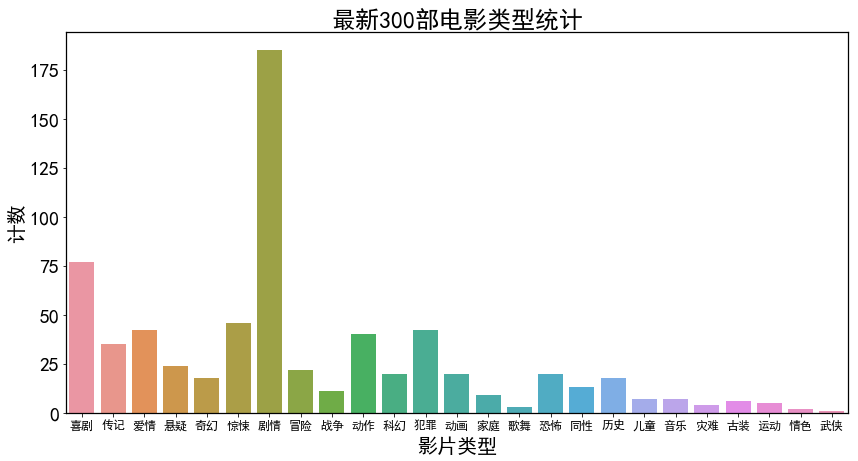

In [41]:
ax = sns.barplot(x=list(genres_dict.keys()), y = list(genres_dict.values())
                )
#$ax = plt.gca()
ax.set_title("最新300部电影类型统计")
ax.set_xlabel('影片类型')
ax.set_ylabel('计数')
plt.xticks(fontsize=12)

** 在最新300部影片中，有多少院线在放的 **

(array([0, 1]), <a list of 2 Text xticklabel objects>)

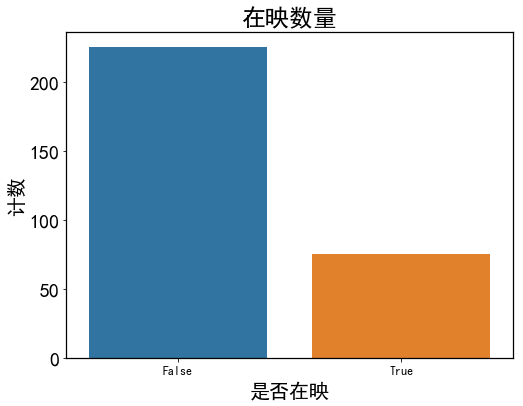

In [42]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'has_linewatch', data=df)
ax.set_title("在映数量")
ax.set_xlabel('是否在映')
ax.set_ylabel('计数')
plt.xticks(fontsize=12)

在映的大概只有还没有上映的1/3

** 语言类型 ** 

In [43]:
languages_dict = {}
for languages in df['languages'].values:
    for language in languages:
        if language in languages_dict.keys():
            languages_dict[language] +=1
        else:
            languages_dict[language] = 1
# languages_dict

In [44]:
lan_df = pd.DataFrame({'lan':list(languages_dict.keys()),
             'count':list(languages_dict.values())})

In [45]:
lan_df = lan_df.sort_values('count', ascending = False)

Text(0.5,1,'最新300语言类型统计')

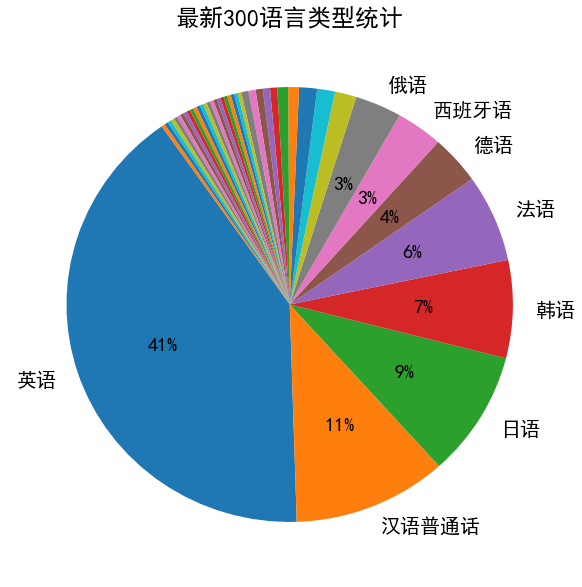

In [46]:
count_all = lan_df['count'].sum()
fracs = [float(n)/count_all for n in lan_df['count'].values]
labels = [n for n in lan_df['lan'].values]
def pie_pct_format(value): #这个value带入的是百分比。value<1表示百分比小于1，则返回空字符串给autotexts
    return '' if value < 3 else '%.0f%%' % value

fig = plt.figure(figsize=(10, 10), facecolor='white', edgecolor='white')
#colors = ['yellowgreen', 'lightskyblue', 'gold', 'purple', 'lightcoral', 'yellow', 'black'] 
#explode = (0.05, 0.05, 0.1, 0, 0, 0, 0)#饼图中间出现缝隙，分离度便于更好的看饼图大小数据
patches, texts, autotexts = plt.pie(fracs,
                                    labels=labels,
#                                     colors=colors,
#                                     explode=explode, #pie图分离度
                                    autopct=pie_pct_format,#返回不同的autotext的值，返回条件是这个函数
                                    shadow=False,  #不用阴影，默认为False
                                    startangle=125 #逆时针旋转角度
                                   )
for text, autotext in zip(texts, autotexts):#根据plt.pie中autopct=pie_pct_format返回的autotext配置返回text
    if autotext.get_text() == '':
        text.set_text('')  # 如果比例太小，不显示百分比标签
#plt.legend(labels, loc=(0.80, -0.1), shadow=True)

ax = plt.gca()
ax.set_title("最新300语言类型统计")
#plt.xticks(fontsize=15)

In [47]:
lan_df.head()

,count,lan
1,157,英语
2,43,汉语普通话
8,36,日语
7,28,韩语
0,25,法语


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text yticklabel objects>)

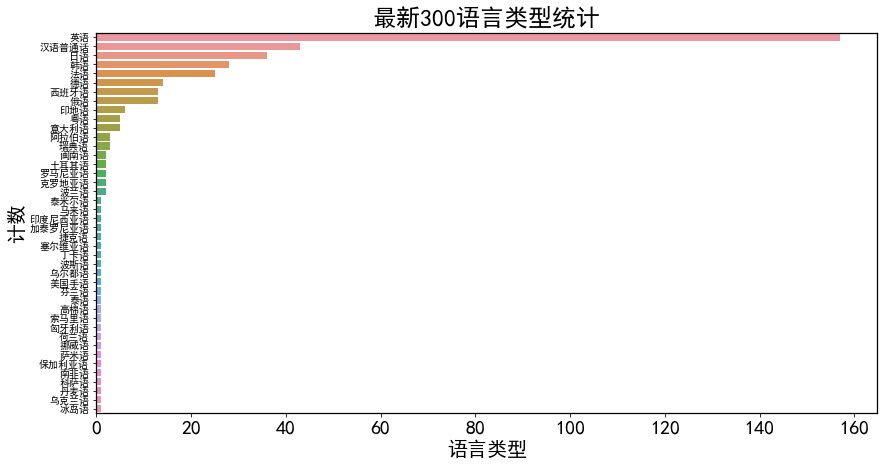

In [48]:
ax = sns.barplot(x='count', y = 'lan'
                 ,data = lan_df
                 ,orient = 'h')
#$ax = plt.gca()
ax.set_title("最新300语言类型统计")
ax.set_xlabel('语言类型')
ax.set_ylabel('计数')
plt.yticks(fontsize=10)

结合前面'出产电影地区分布'来看，美国+英国+加拿大只占了37%，而英语占据了41%。说明了英语在电影的全球统治地位

** 电影首发地点分析 **

In [49]:
import re
import numpy as np
def get_pub_loc(data, pattern, n):
    string = data[0] if len(data) > 0 else ''
    result = re.search(pattern, string)
    if result:
        #print(result.group(n))
        return result.group(n)[1:-1]
    return np.NaN
df['pubdate_loc'] = df['pubdate'].apply(lambda x:get_pub_loc(x, pattern='\(\w+\)', n=0))

In [50]:
df_loc = df.groupby('pubdate_loc').size().to_frame().sort_values(0, ascending=False)

In [51]:
df_loc.head()

,0
pubdate_loc,
中国大陆,60
日本,33
美国,29
韩国,22
多伦多电影节,20


Text(0.5,1,'最新300语言类型统计')

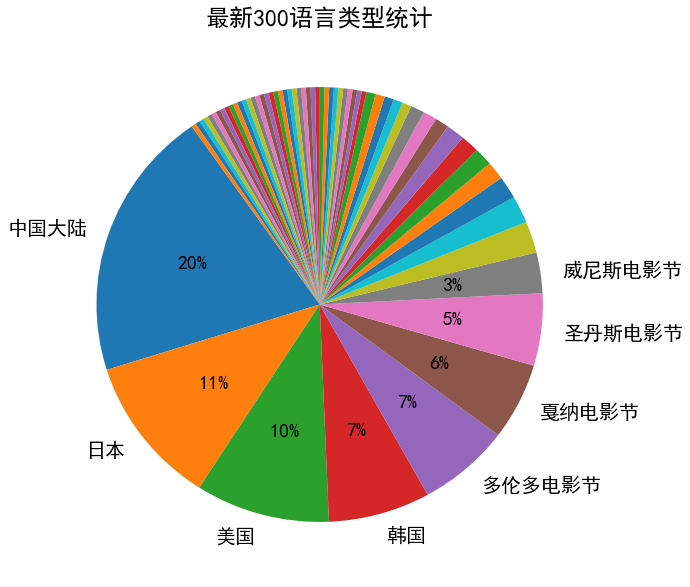

In [52]:
count_all = df_loc[0].sum()
fracs = [float(n)/count_all for n in df_loc[0].values]
labels = [n for n in df_loc.index.values]
def pie_pct_format(value): #这个value带入的是百分比。value<1表示百分比小于1，则返回空字符串给autotexts
    return '' if value < 3 else '%.0f%%' % value

fig = plt.figure(figsize=(10, 10), facecolor='white', edgecolor='white')
#colors = ['yellowgreen', 'lightskyblue', 'gold', 'purple', 'lightcoral', 'yellow', 'black'] 
#explode = (0.05, 0.05, 0.1, 0, 0, 0, 0)#饼图中间出现缝隙，分离度便于更好的看饼图大小数据
patches, texts, autotexts = plt.pie(fracs,
                                    labels=labels,
#                                     colors=colors,
#                                     explode=explode, #pie图分离度
                                    autopct=pie_pct_format,#返回不同的autotext的值，返回条件是这个函数
                                    shadow=False,  #不用阴影，默认为False
                                    startangle=125 #逆时针旋转角度
                                   )
for text, autotext in zip(texts, autotexts):#根据plt.pie中autopct=pie_pct_format返回的autotext配置返回text
    if autotext.get_text() == '':
        text.set_text('')  # 如果比例太小，不显示百分比标签
#plt.legend(labels, loc=(0.80, -0.1), shadow=True)

ax = plt.gca()
ax.set_title("最新300语言类型统计")
#plt.xticks(fontsize=15)

看这个分析，好像在中国首发的电影最多，一是中国市场太有吸引力，而是本来就是中国的网站，有一定的偏向性

** 电影评分数量分析 **

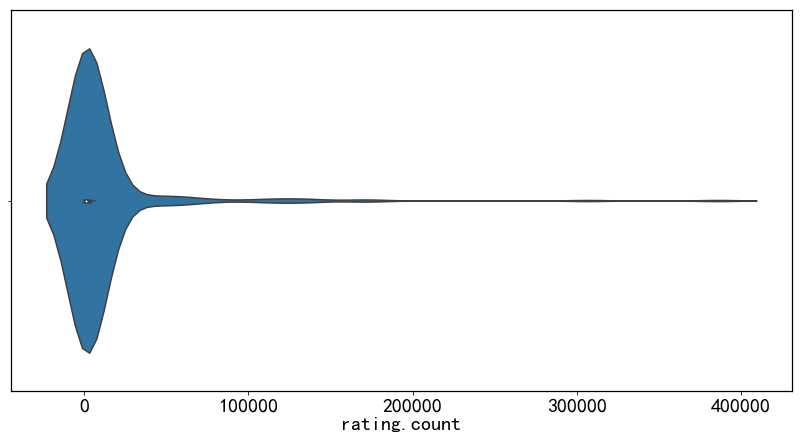

In [53]:
sns.violinplot(y='rating.count', data=df[['rating.count']]
              ,orient ='h')
#大部分电影的品论数都比较少，很集中

(array([ 279.,   10.,    3.,    4.,    2.,    0.,    0.,    1.,    0.,    1.]),
 array([  3.19000000e+02,   3.88785000e+04,   7.74380000e+04,
          1.15997500e+05,   1.54557000e+05,   1.93116500e+05,
          2.31676000e+05,   2.70235500e+05,   3.08795000e+05,
          3.47354500e+05,   3.85914000e+05]),
 <a list of 10 Patch objects>)

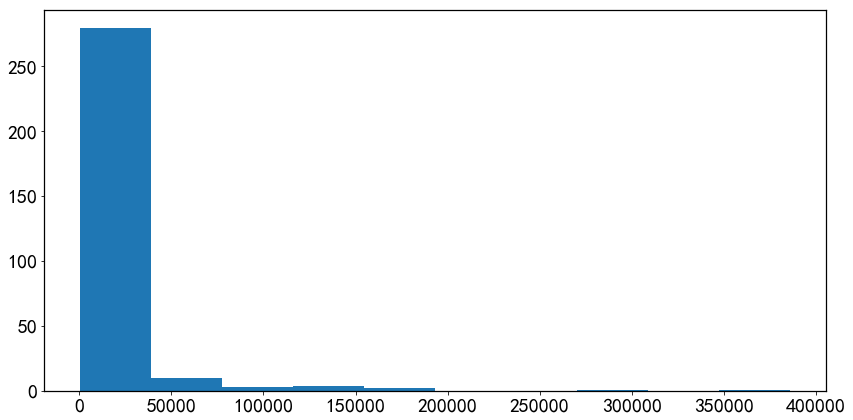

In [54]:
plt.hist(df['rating.count'])

In [55]:
df['rating.count'].describe()

count       300.000000
mean      10233.633333
std       36805.103442
min         319.000000
25%         555.500000
50%         996.000000
75%        2848.750000
max      385914.000000
Name: rating.count, dtype: float64

评论数量比较集中，差距非常的大。

** 评分分析 **

In [56]:
df[['rating.value']].describe()

,rating.value
count,300.000000
mean,6.627667
std,0.911173
min,5.000000
25%,6.000000
50%,6.600000
75%,7.300000
max,9.200000


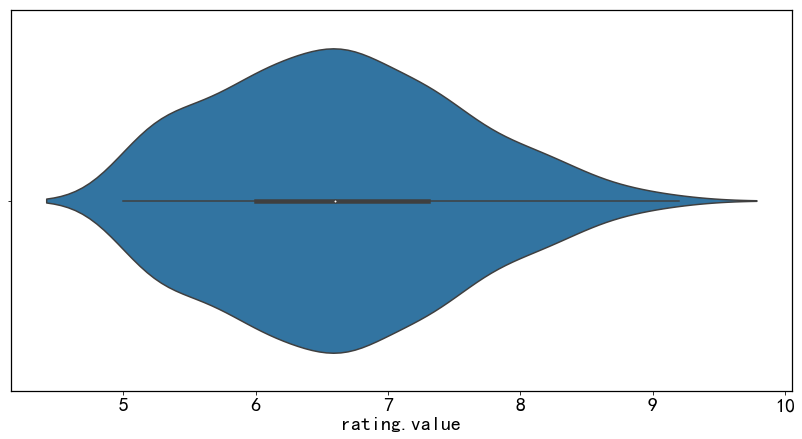

In [57]:
sns.violinplot(y='rating.value', data=df[['rating.value']]
              ,orient ='h')
#大部分电影的评分均值是6.7左右，评分相对还是有点儿正态分布的意思

**定义一个评分的区间：**
* rating <= 5 烂片
* 5 < rating <= 6 很无聊
* 6 < rating <= 7 消磨时间
* 7 < rating <= 8 可观摩
* rating > 8 一定要看

df.columns

In [58]:
def rating_range(value):
    if value <=5:
        return "烂片"
    elif value <=6:
        return "很无聊"
    elif value <=7:
        return "消磨时间"
    elif value <=8:
        return "可观摩"
    elif value >8:
        return "一定要看"
    return "无分数"
rating_value_df = df[['title', 'rating.value', 'rating.count']]
rating_value_df['rating_range'] = rating_value_df['rating.value'].apply(rating_range)
rating_value_df['rating_range'].value_counts()

/home/bigdata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


消磨时间    119
很无聊      85
可观摩      72
一定要看     23
烂片        1
Name: rating_range, dtype: int64

Text(0,0.5,'计数')

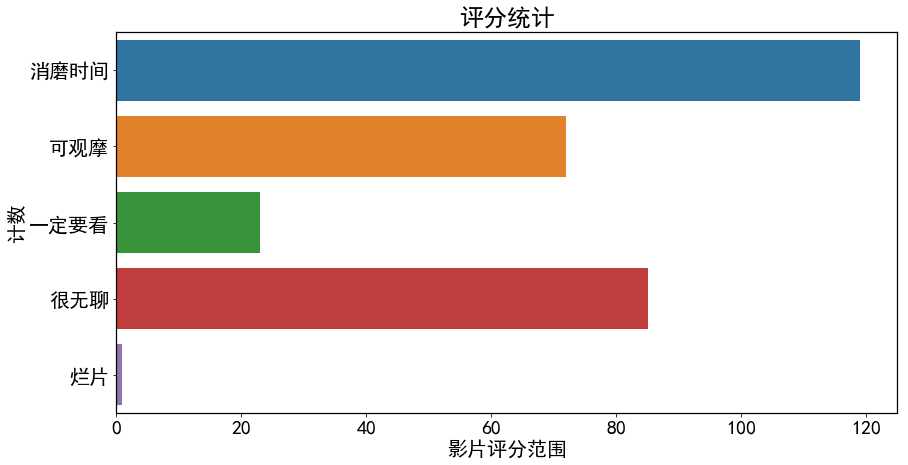

In [59]:
ax = sns.countplot(y = rating_value_df['rating_range']
              ,orient = 'h')
ax.set_title("评分统计")
ax.set_xlabel('影片评分范围')
ax.set_ylabel('计数')


烂片几乎没有，看来大家还是比较手软。大部分的影片都是再消磨时间的区间，6-7分。而8分以上的影片居然有20部以上，出乎意料。

In [60]:
rating_value_df[rating_value_df['rating.value']>8]

,title,rating.value,rating.count,rating_range
100,起跑线,8.2,10529,一定要看
119,我能说,8.8,25527,一定要看
121,相爱相亲,8.4,68229,一定要看
170,莫娣,8.8,7920,一定要看
177,银翼杀手2049,8.3,166979,一定要看
178,约翰之子,8.3,1176,一定要看
188,小戏骨：红楼梦之刘姥姥进大观园,9.2,21116,一定要看
201,铁雨,8.1,17283,一定要看
203,每分钟120击,8.4,11417,一定要看
233,华盛顿邮报,8.1,3169,一定要看


In [61]:
#为了避免小量高分评论拉高或降低rating.value，所以给了一个限定评论1000以上的才会进入评分排序
rating_value_df[rating_value_df['rating.count']> 1000].sort_values('rating.value',ascending = False)[:10]

,title,rating.value,rating.count,rating_range
188,小戏骨：红楼梦之刘姥姥进大观园,9.2,21116,一定要看
52,寻梦环游记,9.0,385914,一定要看
119,我能说,8.8,25527,一定要看
170,莫娣,8.8,7920,一定要看
47,三块广告牌,8.7,54034,一定要看
32,奇迹男孩,8.6,67977,一定要看
33,至暗时刻,8.6,59726,一定要看
203,每分钟120击,8.4,11417,一定要看
121,相爱相亲,8.4,68229,一定要看
54,勇往直前,8.4,11979,一定要看


Text(0,0.5,'影片评分范围')

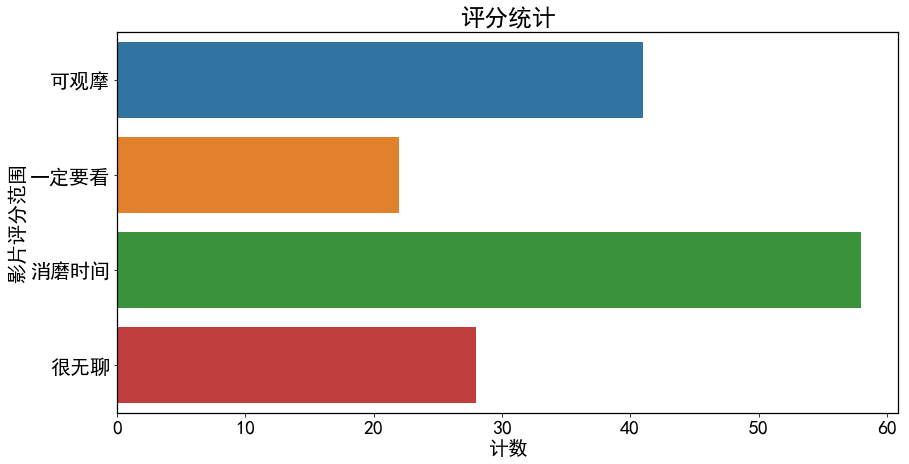

In [62]:
ax = sns.countplot(y = rating_value_df[rating_value_df['rating.count']> 1000]['rating_range']
              ,orient = 'h')
ax.set_title("评分统计")
ax.set_xlabel('计数')
ax.set_ylabel('影片评分范围')


#### 是否有试看影片

Text(0,0.5,'是否有试看')

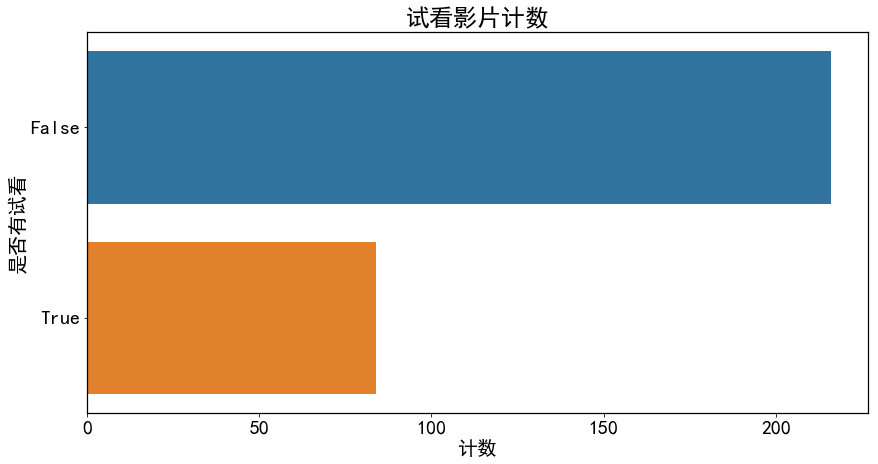

In [63]:
ax = sns.countplot(y = df['trailer.create_time'].isnull().values
              ,orient = 'h')
ax.set_title("试看影片计数")
ax.set_xlabel('计数')
ax.set_ylabel('是否有试看')

## 对豆瓣短评进行分析

In [64]:
comments = pd.read_json('structure_comments.json')
comments.head(3)

,comment,create_time,id,index,rating.value,sharing_url,title,url,user.avatar,user.id,user.loc.name,user.loc.uid,user.name,user.uid,user.url,vote_count
0,别人笑我太疯癫，我笑别人爱！烂！片！关于影史最经典烂片的诞生，迷影情结和无心插柳成就了喜剧的...,2017-11-26 16:35:09,1276895900,0,5.0,https://www.douban.com/doubanapp/dispatch?uri=...,灾难艺术家,https://movie.douban.com/subject/25944886/,https://img3.doubanio.com/icon/up3540441-63.jpg,3540441,None,None,同志亦凡人中文站,3540441,https://www.douban.com/people/3540441/,217
1,影院坐满，每个原片梗一个不落都有掌声欢呼，好像经典电影狂热影迷包场的效果～“希区柯克都没这待...,2017-12-02 13:46:33,1279768367,1,4.0,https://www.douban.com/doubanapp/dispatch?uri=...,灾难艺术家,https://movie.douban.com/subject/25944886/,https://img3.doubanio.com/icon/up10329544-11.jpg,10329544,上海,shanghai,P-nutButterFry,roy4321210,https://www.douban.com/people/10329544/,196
10,付兰兰演员四星，导演两星。胜在故事题材人物天然有趣，败在几乎平铺直叙看得困意袭来,2018-01-09 10:48:51,1302899646,107,3.0,https://www.douban.com/doubanapp/dispatch?uri=...,灾难艺术家,https://movie.douban.com/subject/25944886/,https://img3.doubanio.com/icon/up1267105-374.jpg,1267105,北京,beijing,jj73浅之,asano,https://www.douban.com/people/1267105/,0


In [65]:
comments.describe()

,id,index,rating.value,user.id,vote_count
count,9.659600e+04,96596.000000,93655.000000,9.659600e+04,96596.000000
mean,1.270904e+09,204.670742,3.350456,6.154748e+07,8.579900
std,4.368337e+07,140.342490,1.003897,5.373540e+07,145.367475
min,3.372917e+07,0.000000,1.000000,1.000023e+06,0.000000
25%,1.256794e+09,84.000000,3.000000,4.018641e+06,0.000000
50%,1.278507e+09,180.000000,3.000000,5.228662e+07,0.000000
75%,1.300003e+09,317.000000,4.000000,9.312422e+07,0.000000
max,1.317867e+09,499.000000,5.000000,1.734683e+08,17138.000000


In [66]:
comments.shape #rating value 中有空值

(96596, 16)

In [67]:
len(comments[comments['rating.value'].isnull()])

2941

In [68]:
comments.groupby('rating.value').size()

rating.value
1.0     3825
2.0    12911
3.0    35683
4.0    29089
5.0    12147
dtype: int64

#### 首先绘一个评分的柱状图

Text(0,0.5,'分数')

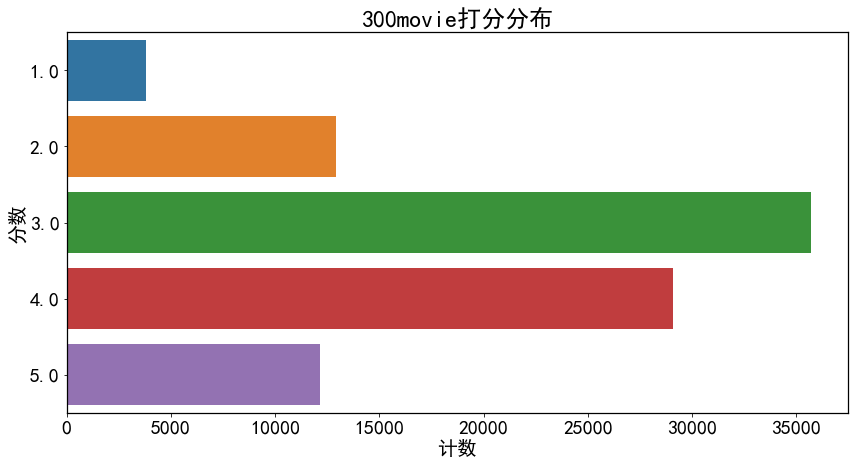

In [69]:
ax = sns.countplot(y = comments['rating.value']
              ,orient = 'h')
ax.set_title("300movie打分分布")
ax.set_xlabel('计数')
ax.set_ylabel('分数')

没有体现出空值

In [70]:
rv_df = comments
rv_df.loc[rv_df['rating.value'].isnull(),'rating.value'] = '无评分'

Text(0,0.5,'分数')

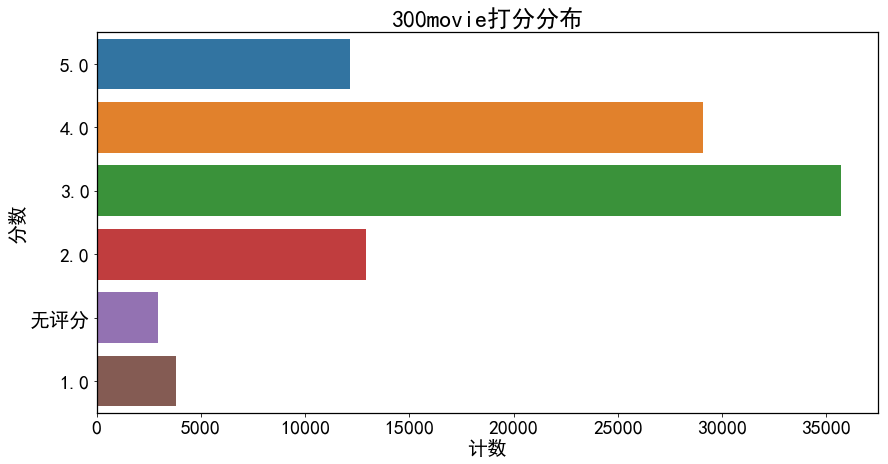

In [71]:
ax = sns.countplot(y = rv_df['rating.value']
              ,orient = 'h')
ax.set_title("300movie打分分布")
ax.set_xlabel('计数')
ax.set_ylabel('分数')

#### 绘一个评论人地区分布的饼图

Text(0.5,1,'评分人员地区分布')

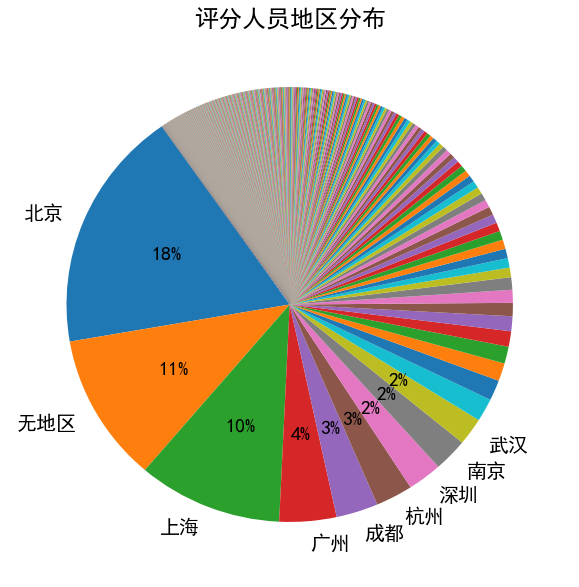

In [72]:
#先处理空值
ln_df = comments
ln_df.loc[ln_df['user.loc.name'].isnull(),'user.loc.name'] = '无地区'

df_loc = ln_df.groupby('user.loc.name').size().to_frame().sort_values(0, ascending=False)
count_all = df_loc[0].sum()
fracs = [float(n)/count_all for n in df_loc[0].values]
labels = [n for n in df_loc.index.values]

def pie_pct_format(value): #这个value带入的是百分比。value<1表示百分比小于1，则返回空字符串给autotexts
    return '' if value < 2 else '%.0f%%' % value

fig = plt.figure(figsize=(10, 10), facecolor='white', edgecolor='white')
#colors = ['yellowgreen', 'lightskyblue', 'gold', 'purple', 'lightcoral', 'yellow', 'black'] 
#explode = (0.05, 0.05, 0.1, 0, 0, 0, 0)#饼图中间出现缝隙，分离度便于更好的看饼图大小数据
patches, texts, autotexts = plt.pie(fracs,
                                    labels=labels,
#                                     colors=colors,
#                                     explode=explode, #pie图分离度
                                    autopct=pie_pct_format,#返回不同的autotext的值，返回条件是这个函数
                                    shadow=False,  #不用阴影，默认为False
                                    startangle=125 #逆时针旋转角度
                                   )
for text, autotext in zip(texts, autotexts):#根据plt.pie中autopct=pie_pct_format返回的autotext配置返回text
    if autotext.get_text() == '':
        text.set_text('')  # 如果比例太小，不显示百分比标签
#plt.legend(labels, loc=(0.80, -0.1), shadow=True)

ax = plt.gca()
ax.set_title("评分人员地区分布")
#plt.xticks(fontsize=15)

#### 看一下评论大神评论的条数，评分的分值

In [73]:
comments = pd.read_json('structure_comments.json')
comments.groupby(['user.name','user.loc.name'])['rating.value'].agg({'rating_count':np.size,'rating_value':np.mean}).sort_values('rating_count',ascending=False)[:10]

/home/bigdata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,,rating_count,rating_value
user.name,user.loc.name,,
麦子,西安,133.0,2.563910
痞影人科莱昂,武汉,127.0,2.685039
华盛顿樱桃树,北京,123.0,2.821138
glim,南京,118.0,2.822034
梦之安魂曲,苏州,94.0,2.819149
SELVEN,北京,93.0,2.891304
只用手机看电影,深圳,92.0,2.923913
颜落寒,上海,89.0,3.258427
SX,台北,86.0,2.976744


有4为同志，300部电影里面评论了100部以上,但是能看得出来，他们都是有追求的人，没有把分数都打得很高

In [74]:
comments[comments['user.name'] == '麦子'][['title','user.name','comment','rating.value']][:10]

,title,user.name,comment,rating.value
10257,公园,麦子,房屋不大但是很有个性，国家不大但是很干净清澈，日本剧的完美主义在各个片子都有反馈，间断看的，...,3.0
11014,以女儿之名,麦子,唉，看完最大的感觉是气愤，30年，从他女儿死，他不可能有真正快乐过，伤害这么大，犯罪人还在继...,4.0
11247,魔法少女伊莉雅：雪下的誓言,麦子,甜美和血腥共存，武功和科技并生，主流喜闻乐见，故事尚可,3.0
11754,狂热郁金香,麦子,这种故事选材一般都很安全，演绎制作也很精良，爱情之美，激情之美，人们总希望自己会有一段不为人...,3.0
12927,复仇行动,麦子,简单的复仇故事，节奏拖沓，有效戏份很少,2.0
13073,美国刺客,麦子,不错的节奏，搏杀和枪战都很干净利索，十余个场景设置和阵容感都还算不错，侦探polo可是超级大牌哦,4.0
13557,赢家,麦子,生活剧，大量的对白和肢体语言，看的心累,2.0
14771,在哥伦布,麦子,很高雅，很独立，很无聊,1.0
1541,再次回家,麦子,各年龄段的精彩对白不少，轻喜剧，爱情和事业的观点碰撞是看点，平静的剧情,3.0
15803,复仇天使,麦子,本该血腥暴力的剧情竟然表现如此平淡，或许我们看过太多而对此种程度免疫了,2.0


#### 点评量随时间的变化
感觉抓取的数据比较少，所以无法进行分析。先看下数据

In [75]:
comments['create_time'].describe()

count                   96596
unique                  95833
top       2018-01-12 16:29:36
freq                        4
first     2016-03-17 17:11:49
last      2018-02-03 20:47:24
Name: create_time, dtype: object

为何最新300部的电影出现了2016年的评论，不解

In [76]:
comments.sort_values('create_time')[:3]

,comment,create_time,id,index,rating.value,sharing_url,title,url,user.avatar,user.id,user.loc.name,user.loc.uid,user.name,user.uid,user.url,vote_count
10857,La justice française被结结实实吐了个大槽,2016-03-17 17:11:49,1022170103,313,4.0,https://www.douban.com/doubanapp/dispatch?uri=...,以女儿之名,https://movie.douban.com/subject/26384493/,https://img3.doubanio.com/icon/up35590451-5.jpg,35590451,Paris,paris,Roala,35590451,https://www.douban.com/people/35590451/,0
10702,又名《摩羯座的爸爸》,2016-03-27 23:59:57,1025642984,174,NaN,https://www.douban.com/doubanapp/dispatch?uri=...,以女儿之名,https://movie.douban.com/subject/26384493/,https://img3.doubanio.com/icon/up55447633-16.jpg,55447633,Paris,paris,nostalgie,tomber,https://www.douban.com/people/55447633/,0
11074,"一个父亲故事。法律，公正和坚持。看他几十年的坚持，年华老去，众叛亲离，我们会思考,我们追求的...",2016-04-02 05:17:03,1027277201,6,4.0,https://www.douban.com/doubanapp/dispatch?uri=...,以女儿之名,https://movie.douban.com/subject/26384493/,https://img3.doubanio.com/icon/up103207266-3.jpg,103207266,None,None,oh la la,103207266,https://www.douban.com/people/103207266/,21


In [77]:
comments['time_str'] = comments['create_time'].apply(lambda x:x.strftime('%Y-%m-%d'))
time_counts = comments.groupby('time_str').size().to_frame()
time_counts = time_counts.sort_index()
time_counts.index = pd.to_datetime(time_counts.index)
time_counts.head()

,0
time_str,
2016-03-17,1
2016-03-27,1
2016-04-02,1
2016-04-30,2
2016-05-12,12


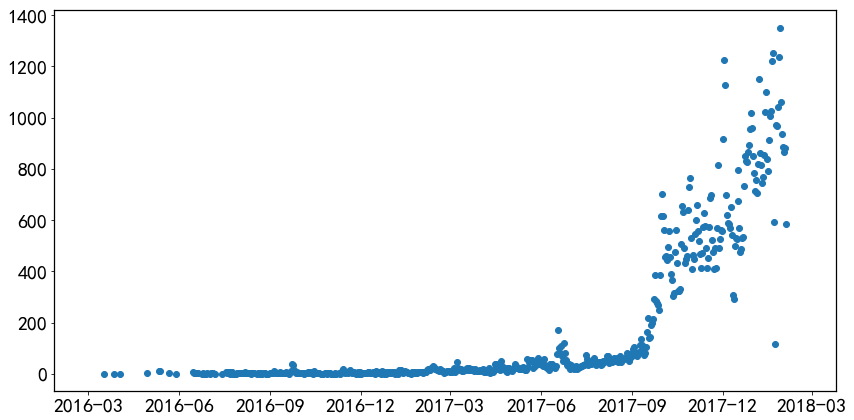

In [78]:
plt.scatter(x=time_counts.index, y=time_counts[0])

最新300部电影点评量随着时间的变化：时间越靠近现在评论越多

#### 所有点评的打分分布

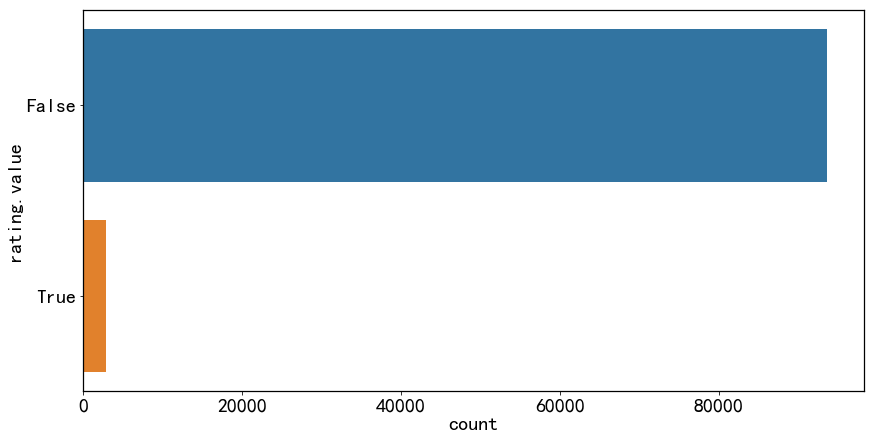

In [79]:
sns.countplot(y = comments['rating.value'].isnull())

大部分还是进行了打分

**只分析有打分的分数**

In [80]:
comments['rating.value'].describe()

count    93655.000000
mean         3.350456
std          1.003897
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: rating.value, dtype: float64

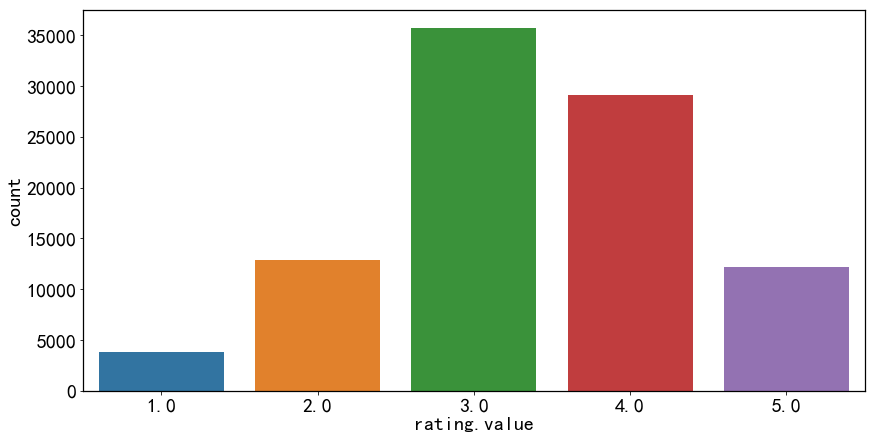

In [81]:
sns.countplot(comments['rating.value'])

在10w条评论中，大家的打分最高是中间分，符合中国人中庸之道。都是往上走，符合与人为善，中国人还是善良的民族

## 开始做所有评论的词云

In [82]:
comments.comment.values

array([ '别人笑我太疯癫，我笑别人爱！烂！片！关于影史最经典烂片的诞生，迷影情结和无心插柳成就了喜剧的最高境界。付兰兰的表演太牛了~~~~（有25分钟是原封不动的还原啊，笑到肠穿肚烂！！！）',
       '影院坐满，每个原片梗一个不落都有掌声欢呼，好像经典电影狂热影迷包场的效果～“希区柯克都没这待遇”，真的。',
       '付兰兰演员四星，导演两星。胜在故事题材人物天然有趣，败在几乎平铺直叙看得困意袭来', ...,
       '某个地方很像着魔，但是整体都太浅了，6.5分。', '这...?', '没搞懂啥意思'], dtype=object)

In [83]:
comments_str = ''
for comment in comments.comment.values:
    comments_str = comments_str + comment.strip()
comments_str[:500]

'别人笑我太疯癫，我笑别人爱！烂！片！关于影史最经典烂片的诞生，迷影情结和无心插柳成就了喜剧的最高境界。付兰兰的表演太牛了~~~~（有25分钟是原封不动的还原啊，笑到肠穿肚烂！！！）影院坐满，每个原片梗一个不落都有掌声欢呼，好像经典电影狂热影迷包场的效果～“希区柯克都没这待遇”，真的。付兰兰演员四星，导演两星。胜在故事题材人物天然有趣，败在几乎平铺直叙看得困意袭来鬼斧神工 耐人寻味有后台的大傻妞.愚蠢不可笑.跟Zulawski差多了！科幻和现实过渡有点生硬，极其不喜欢最开始宇宙视角。物化的处理也没有多新鲜。配乐真好。结婚真好吓到我了平静背后的黑暗性压抑的隐喻 用刺激感官的镜头来表现很聪明 最为震撼的是动物群交画面 虽然触手怪物直接抄袭着魔 但影片结尾的不寒而栗也是同样很棒了 所有人都终将因欲望而死去纯粹的讨论性爱，其实没有太多意义。影片比较沉闷骚气，性爱场面较多，性爱种类不少，男女，搞基，怪兽等等，但都属三级以下档次，漏的不多，也不够刺激，剧情没太大关系，主要以解释这些性爱的因果关系为主。性最重要啦！形散神也散。3.5 被戳到底线了吗 怕了吗法国“葛优”自导自演，爆笑连连，轻松愉快！有点'

In [84]:
len(comments_str)

4457579

In [85]:
#去掉标点符号
import re

pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments_str)
cleaned_comments = ''.join(filterdata)
cleaned_comments[:500]

'别人笑我太疯癫我笑别人爱烂片关于影史最经典烂片的诞生迷影情结和无心插柳成就了喜剧的最高境界付兰兰的表演太牛了有分钟是原封不动的还原啊笑到肠穿肚烂影院坐满每个原片梗一个不落都有掌声欢呼好像经典电影狂热影迷包场的效果希区柯克都没这待遇真的付兰兰演员四星导演两星胜在故事题材人物天然有趣败在几乎平铺直叙看得困意袭来鬼斧神工耐人寻味有后台的大傻妞愚蠢不可笑跟差多了科幻和现实过渡有点生硬极其不喜欢最开始宇宙视角物化的处理也没有多新鲜配乐真好结婚真好吓到我了平静背后的黑暗性压抑的隐喻用刺激感官的镜头来表现很聪明最为震撼的是动物群交画面虽然触手怪物直接抄袭着魔但影片结尾的不寒而栗也是同样很棒了所有人都终将因欲望而死去纯粹的讨论性爱其实没有太多意义影片比较沉闷骚气性爱场面较多性爱种类不少男女搞基怪兽等等但都属三级以下档次漏的不多也不够刺激剧情没太大关系主要以解释这些性爱的因果关系为主性最重要啦形散神也散被戳到底线了吗怕了吗法国葛优自导自演爆笑连连轻松愉快有点像那部地下影片末世肉体魔幻现实里的恐同与家暴克苏鲁式章鱼是一切合理与不合理的前提很有意思的设定镜头个人情绪很浓能感受到导演的绝望与怒女主挺好看紀念拍'

In [86]:
#词频统计
import jieba    #分词包

segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})
words_df.sample(20)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.397 seconds.
Prefix dict has been built succesfully.


,segment
1125830,男
340670,台湾
894569,一绝
1970754,以为
1041986,男主好
1421822,指甲
1016990,好莱坞
1946545,造作
425822,还是
4196,也


In [87]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
stopwords.head()

,stopword
0,","
1,?
2,、
3,。
4,“


In [88]:
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_df.sample(10)

,segment
913723,般的
627131,电影
724484,不见
709884,继承
1832146,华尔街
760890,故事
1855717,永恒
852204,反观
1919382,人
225426,尊重


In [89]:
words_df.shape

(1369107, 1)

In [90]:
#词频统计
import numpy    #numpy计算包
words_stat = words_df.groupby('segment')['segment'].agg({'count':'size'}).reset_index().sort_values(by=["count"],ascending=False)
words_stat.head()

/home/bigdata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,segment,count
63022,电影,14869
6944,人,12209
28345,好,10609
45770,故事,9026
58,一个,8862


In [91]:
!ls

background2.jpg       movie300new.json		    stopwords.txt
background.jpg	      movie300new_mobile_info.json  structure_comments.json
background.png	      show_Chinese.png		    visualization.ipynb
movie300_mobile.json  SimHei.ttf


In [92]:
#词云显示
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

wordcloud=WordCloud(font_path="SimHei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}


In [94]:
from PIL import Image
bg_pic = numpy.array(Image.open("background.jpg"))
wordcloud = WordCloud(
        font_path="SimHei.ttf",
        background_color="white",
        max_font_size=80,
        width = 900,
        height = 900,
        mask = bg_pic,
        mode = "RGBA"
    )

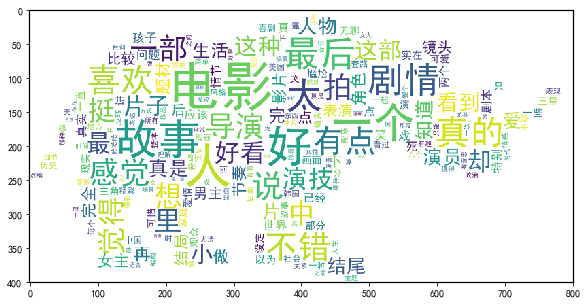

In [95]:
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

“电影”两个字最大，因为这个是电影评论，还有停用词应该加入的一个，一部，说，挺，等等等

#### 做一个更有意义的，把评论最高的影片拿出来做一个词云

In [96]:
movie300_choosed_column.sort_values('comment_count',ascending=False)[['title','comment_count']][:3]

,title,comment_count
52,寻梦环游记,171415
195,羞羞的铁拳,135549
218,王牌特工2：黄金圈,73950


In [98]:
comments_str = ''
for comment in comments[comments['title']=='寻梦环游记'].comment.values:
    comments_str = comments_str + comment.strip()
len(comments_str)

34922

/home/bigdata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


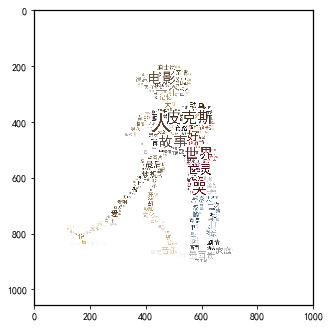

In [106]:
#去掉标点符号
import re

pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments_str)
cleaned_comments = ''.join(filterdata)

#词频统计
segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})

#停用词
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

#词频统计
words_stat = words_df.groupby('segment')['segment'].agg({'count':'size'}).reset_index().sort_values(by=["count"],ascending=False)

#词云显示
matplotlib.rcParams['figure.figsize'] = (5.0, 10.0)

wordcloud=WordCloud(font_path="SimHei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}

bg_pic = numpy.array(Image.open("background2.jpg"))
wordcloud = WordCloud(
        font_path="SimHei.ttf",
        background_color="white",
        max_font_size=80,
        width = 900,
        height = 900,
        mask = bg_pic,
        mode = "RGBA"
    )
wordcloud=wordcloud.fit_words(word_frequence)

from wordcloud import ImageColorGenerator
bimgColors=ImageColorGenerator(bg_pic)
plt.imshow(wordcloud.recolor(color_func=bimgColors))

In [107]:
#写入文件备用
wordcloud.to_file('movie_coco1.png')